# Project: Investigate income per person, child mortality and children per woman datasets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">Refererences</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This document explores three data sets: 

> 1) The fertiltiy rate: The average number of children per woman in each country since 1880 until now (the end of year 2020)

> 2) The income per person: Gross domestic product(GDP) per capita(divided by the population of the country) that is adjusted to reflect the purchasing power parity (PPP) and to take into account the years' inflation rate, in international dollars, fixed 2011 prices, PPP based on 2011 ICP; in each country since 1880 until now (the end of year 2020)

> 3) The mortality of children whose ages are between 0 to 5 years old in every thousand born children in each country since 1880 until now (the end of year 2020)

> This document answers to these questions:

> 1) Do people in countries whose enfant mortality high, tend to give birth to more children (fertility rate) to compensate their dead children?

> 2) Is there any relationship between the income of people and their fertility rate?

> 3) Does the financial state of people affect their enfant mortality?

> 4) Is there any tendencies in fertility rate along years?

> 5) Is there any tendencies in enfant mortality along years?

> 6) Is there any tendencies in personal income along years?

> 7) What is the order of countries and continents according to fertility rate in 2020?

> 8) What is the order of countries and continents according to the income per person in 2020?

> 9) What is the order of countries and continents according to the enfant mortality in 2020?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import geopandas as gpd
import PIL
import io
import matplotlib.image as mpimg
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#import plotly.plotly as py
#import plotly.tools as tls
import matplotlib.pyplot as plt
import time
import mapclassify
#import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> Columns of years more than 2020 are dropped because these are not actual data. They are just forcasting.

In [2]:
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
#drop years after 2020
df_income.drop(df_income.columns[222:],axis=1,inplace=True)
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1630,1770,1810,1800,1770,1760,1760,1740,1760,1800
1,Albania,667,667,667,667,667,668,668,668,668,...,10200,10400,10500,10700,11000,11400,11800,12300,12700,13200
2,Algeria,715,716,717,718,719,720,721,722,723,...,13000,13200,13300,13500,13800,13900,13900,13900,14000,14000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,42000,41900,43700,44900,46600,48200,49800,51500,53200,55000
4,Angola,618,620,623,626,628,631,634,637,640,...,6350,6650,6730,6810,6650,6260,6050,5730,5540,5440


In [3]:
df_fertility = pd.read_csv('children_per_woman_total_fertility.csv')
#drop years after 2020
df_fertility.drop(df_fertility.columns[222:],axis=1,inplace=True)
df_fertility.head()


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33,4.18,4.04
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71,1.70,1.70
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64,2.59,2.54
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55,5.48,5.41
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03,2.02,2.01


In [4]:
df_mortality = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
#drop years after 2020
df_mortality.drop(df_mortality.columns[222:],axis=1,inplace=True)
df_mortality.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,84.10,80.50,77.00,73.50,70.40,67.50,64.70,62.30,60.10,58.10
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,12.30,11.40,10.70,10.10,9.60,9.27,9.02,8.82,8.68,8.52
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,26.70,26.10,25.70,25.30,24.90,24.50,24.00,23.50,22.80,22.20
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.98,3.79,3.61,3.43,3.27,3.14,3.01,2.89,2.87,2.85
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,113.00,105.00,98.40,92.90,88.10,84.00,80.40,77.20,74.50,72.30


In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_fertility.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,6.110707,6.107663,6.111033,6.110054,6.110435,6.110217,6.105815,6.104511,6.096359,6.084457,...,2.962283,2.932337,2.902717,2.869457,2.835924,2.801957,2.769348,2.737609,2.706957,2.677391
std,0.791456,0.795118,0.789068,0.788346,0.788456,0.784976,0.790403,0.791440,0.806280,0.834796,...,1.489848,1.459351,1.428993,1.400419,1.372184,1.343670,1.314814,1.286030,1.257439,1.229788
min,4.040000,4.040000,3.910000,4.050000,3.940000,4.060000,4.070000,4.050000,4.000000,3.210000,...,1.210000,1.220000,1.240000,1.250000,1.240000,1.240000,1.230000,1.230000,1.230000,1.230000
25%,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,...,1.797500,1.797500,1.790000,1.787500,1.777500,1.750000,1.757500,1.750000,1.747500,1.747500
50%,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.180000,6.160000,6.160000,...,2.455000,2.410000,2.380000,2.360000,2.335000,2.315000,2.285000,2.265000,2.245000,2.215000
75%,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,...,4.027500,4.002500,3.960000,3.902500,3.842500,3.767500,3.690000,3.622500,3.545000,3.502500
max,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,...,7.460000,7.420000,7.380000,7.340000,7.290000,7.240000,7.180000,7.130000,7.070000,7.000000


In [6]:
(df_fertility.min(axis=1)).min()

1.12

In [7]:
(df_fertility.max(axis=1)).max()

8.87

From the above results of min and max values, it is decided to make the range of legend of fertility map from 1 to 9 according to the minimum and maximum values in the above data frame

In [8]:
#df_fertility.info(verbose=True) 
df_income.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,978.523316,978.948187,980.725389,980.922280,981.911917,982.502591,982.829016,985.419689,980.937824,982.393782,...,16940.300518,17092.694301,17227.093264,17427.777202,17686.046632,17894.621762,18173.010363,18462.865285,18647.466321,18950.347150
std,579.633227,579.915248,582.565512,582.032626,583.963199,584.043985,584.097850,590.514505,578.200194,581.878397,...,19167.621277,18986.122878,18887.928089,18949.791996,19182.932121,19262.863680,19393.333678,19615.529399,19718.345658,19982.699867
min,250.000000,250.000000,249.000000,249.000000,249.000000,249.000000,248.000000,248.000000,248.000000,248.000000,...,614.000000,616.000000,619.000000,621.000000,623.000000,625.000000,627.000000,629.000000,631.000000,628.000000
25%,592.000000,592.000000,592.000000,592.000000,592.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,3420.000000,3570.000000,3630.000000,3560.000000,3390.000000,3470.000000,3650.000000,3740.000000,3910.000000,4030.000000
50%,817.000000,822.000000,826.000000,831.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,...,10000.000000,10200.000000,10500.000000,10900.000000,11100.000000,11400.000000,11700.000000,12100.000000,12000.000000,12300.000000
75%,1160.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1160.000000,1170.000000,...,22900.000000,24000.000000,23600.000000,24400.000000,25100.000000,25600.000000,26400.000000,27100.000000,27800.000000,28300.000000
max,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,124000.000000,120000.000000,118000.000000,117000.000000,116000.000000,114000.000000,113000.000000,113000.000000,113000.000000,116000.000000


In [9]:
(df_income.min(axis=1)).min()

245

In [10]:
(df_income.max(axis=1)).max()

179000

From the above results of min and max values, it is decided to make the range of legend of income map from 245 to 179,000 according to the minimum and maximum values in the above data frame

In [11]:
df_mortality.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,424.543478,423.918478,423.271739,422.858696,422.478261,422.065217,422.065217,421.505435,421.494565,421.146739,...,35.829846,34.446974,33.177333,32.025692,30.947590,29.930308,28.944359,28.010923,27.201846,26.438821
std,45.319368,45.727500,46.390150,46.572719,46.706730,46.898053,46.093467,46.682862,45.973026,46.202633,...,36.381885,34.911238,33.590452,32.399137,31.269097,30.194907,29.227892,28.326894,27.558327,26.836237
min,322.000000,322.000000,283.000000,275.000000,272.000000,266.000000,309.000000,278.000000,316.000000,299.000000,...,2.520000,2.430000,2.340000,2.260000,2.180000,2.020000,1.850000,1.700000,1.630000,1.580000
25%,395.750000,395.750000,395.000000,394.750000,393.000000,393.000000,392.000000,391.750000,391.000000,391.000000,...,8.415000,8.265000,8.020000,7.955000,7.830000,7.580000,7.325000,7.060000,6.785000,6.570000
50%,423.500000,423.500000,422.000000,422.000000,422.000000,422.000000,422.000000,420.500000,420.000000,420.000000,...,19.200000,18.600000,18.300000,18.100000,17.800000,17.400000,17.000000,16.600000,15.900000,15.500000
75%,453.500000,452.750000,452.500000,451.250000,451.250000,450.250000,448.000000,448.000000,447.000000,447.000000,...,55.950000,53.600000,52.100000,50.350000,48.300000,46.300000,44.500000,42.750000,40.900000,39.400000
max,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,154.000000,147.000000,142.000000,138.000000,133.000000,129.000000,125.000000,122.000000,119.000000,117.000000


In [12]:
(df_mortality.min(axis=1)).min()

1.58

In [13]:
(df_mortality.max(axis=1)).max()

756.0

> From the above results of min and max values, it is decided to make the range of legend of mortality map from 1 to 756 according to the minimum and maximum values in the above data frame

In [14]:
df_fertility['country'].count()

184

In [15]:
df_income['country'].count()

193

In [16]:
df_mortality['country'].count()

195

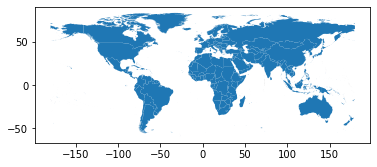

In [17]:
world_map = gpd.read_file("World_Map.shx")#, encoding="utf-8")#.copy()
world_map.plot();

Data cleaning needed is to let countries in df_fertililty match exactly the name of countries in world_map

In [18]:
#i=0
for item in df_fertility['country']:
    if item not in world_map['NAME'].to_list():
        print(item)#print(i,item)
        #i = i+1

Brunei
Congo, Dem. Rep.
Congo, Rep.
Eswatini
Iran
Kyrgyz Republic
Lao
Libya
Micronesia, Fed. Sts.
Moldova
Myanmar
North Korea
North Macedonia
Slovak Republic
South Korea
South Sudan
St. Lucia
St. Vincent and the Grenadines
Syria
Tanzania
Vietnam


In [19]:
for item in world_map['NAME']:
    print(item)

Antigua and Barbuda
Algeria
Azerbaijan
Albania
Armenia
Angola
American Samoa
Argentina
Australia
Bahrain
Barbados
Bermuda
Bahamas
Bangladesh
Belize
Bosnia and Herzegovina
Bolivia
Burma
Benin
Solomon Islands
Brazil
Bulgaria
Brunei Darussalam
Canada
Cambodia
Sri Lanka
Congo
Democratic Republic of the Congo
Burundi
China
Afghanistan
Bhutan
Chile
Cayman Islands
Cameroon
Chad
Comoros
Colombia
Costa Rica
Central African Republic
Cuba
Cape Verde
Cook Islands
Cyprus
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
Ireland
Equatorial Guinea
Estonia
Eritrea
El Salvador
Ethiopia
Austria
Czech Republic
French Guiana
Finland
Fiji
Falkland Islands (Malvinas)
Micronesia, Federated States of
French Polynesia
France
Gambia
Gabon
Georgia
Ghana
Grenada
Greenland
Germany
Guam
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Croatia
Hungary
Iceland
India
Iran (Islamic Republic of)
Israel
Italy
Cote d'Ivoire
Iraq
Japan
Jamaica
Jordan
Kenya
Kyrgyzstan
Korea, Democratic People's Republic of
Kiribati
Ko

In [20]:
world_map

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
242,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


In [21]:
replace_dict = {
'Brunei':'Brunei Darussalam',
'Congo, Dem. Rep.':'Democratic Republic of the Congo',
'Congo, Rep.':'Congo',
'Eswatini':'Swaziland',
'Iran': 'Iran (Islamic Republic of)',
'Kyrgyz Republic':'Kyrgyzstan',
'Lao':"Lao People's Democratic Republic",
'Libya': 'Libyan Arab Jamahiriya',
'Micronesia, Fed. Sts.':'Micronesia, Federated States of',
'Moldova':'Republic of Moldova',
'Myanmar':'Burma',
'North Korea': "Korea, Democratic People's Republic of",
'North Macedonia':'The former Yugoslav Republic of Macedonia',
'Slovak Republic':'Slovakia',
'South Korea':'Korea, Republic of',
'South Sudan':'Sudan',
'St. Lucia':'Saint Lucia',
'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
'Syria':'Syrian Arab Republic',
'Tanzania':'United Republic of Tanzania',
'Vietnam':'Viet Nam',
'Israel':'Palestine'
}

In [22]:
for key, value in replace_dict.items():
    df_fertility['country'].replace(key, value, inplace=True)
    df_income['country'].replace(key, value, inplace=True)
    df_mortality['country'].replace(key, value, inplace=True)

world_map['NAME'].replace('Israel', 'Palestine', inplace=True)

In [23]:
for item in df_mortality['country']:
    if item not in world_map['NAME'].to_list():
        print(item)#print(i,item)

Holy See
St. Kitts and Nevis


In [24]:
for item in df_income['country']:
    if item not in world_map['NAME'].to_list():
        print(item)#print(i,item)

St. Kitts and Nevis


In [25]:
df_mortality['country'].replace('Holy See','Holy See (Vatican City)', inplace=True)
df_mortality['country'].replace('St. Kitts and Nevis','Saint Kitts and Nevis', inplace=True)
df_income['country'].replace('St. Kitts and Nevis','Saint Kitts and Nevis', inplace=True)

In [26]:
world_map.rename(columns={'NAME':'country'}, inplace=True)
      
world_map


,country,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
242,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


In [27]:

df_fertility = df_fertility.merge(world_map, how='left', on='country')
df_fertility.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,geometry
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,5.38,5.17,4.98,4.80,4.64,4.48,4.33,4.18,4.04,"POLYGON ((74.91574 37.23733, 74.83221 37.22041..."
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.69,1.70,1.71,1.71,1.71,1.71,1.71,1.70,1.70,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.94,2.92,2.89,2.84,2.78,2.71,2.64,2.59,2.54,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.00,5.92,5.84,5.77,5.69,5.62,5.55,5.48,5.41,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.10,2.09,2.08,2.06,2.05,2.04,2.03,2.02,2.01,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."


Text(0.5, 1.0, 'Fertility in 1880')

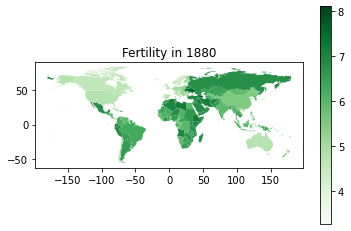

In [28]:
gdf = gpd.GeoDataFrame(df_fertility)
fig = gdf.plot(column='1880', cmap='Greens', legend=True);
fig.set_title("Fertility in 1880")

Text(0.5, 1.0, 'Fertility in 2020')

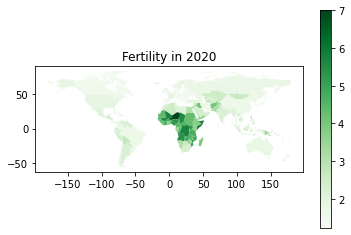

In [29]:
fig = gdf.plot(column='2020', cmap='Greens', legend=True);
fig.set_title("Fertility in 2020")

But you may notice in the previous 2 maps that the legends are not fixed because the range of the fertility rate differs from one year to another; therefore, we should fix it to give the right feeling of numbers to the user

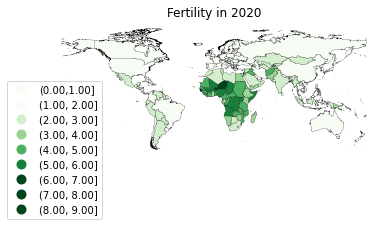

In [30]:
fig = gdf.plot(column='2020', cmap='Greens', edgecolor='black', linewidth=0.2, legend=True, scheme='user_defined', classification_kwds=dict(bins=[1,2,3,4,5,6,7,8,9]))#vmin=0, vmax=9, k=9, classification_kwds={'bins':[1,2,3,4,5,6,7,8,9]},)
fig.set_title("Fertility in 2020")
#remove the axes and move the legend
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0.18,0.6))

#remove -inf that appears at the beginning of the legend
fig.get_legend().get_texts()[0].set_text('(0.00,1.00]')


This is a markdown cell. This is the code I wrote to create an animated gif image of fertility rate all over the world from years 1880 to 2020. However, running this code will consume a lot of memory and time; so, you can see the outputed gif image dicrectly when you run the next markdown cell.
```python
image_frames = []
for i in range(1, 222):# from 1880 to 2020 
    column_name = df_fertility.columns[i]
    fig = gdf.plot(column=column_name, cmap='Greens', edgecolor='black', linewidth=0.2, legend=True, scheme='user_defined', classification_kwds={'bins':[1,2,3,4,5,6,7,8,9]},)
    fig.set_title("Fertility in "+column_name)
    fig.set_axis_off()
    fig.get_legend().set_bbox_to_anchor((0.18,0.6)) 
    #remove -inf that appears at the beginning of the legend
    fig.get_legend().get_texts()[0].set_text('(0.00,1.00]')
    img = fig.get_figure()
    f = io.BytesIO()
    img.savefig(f, format = 'png')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))
image_frames[0].save('Fertility Rate.gif', format='GIF', append_images=image_frames[1:], save_all=True, duration=200, loop=0) #loop=0 means infinite loop
f.close()
```

<img src="Fertility Rate.gif" width="700" align="center">

Let's make the same for df_income and df_mortality

In [31]:
df_income = df_income.merge(world_map, how='left', on='country')
df_income

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,geometry
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1770,1810,1800,1770,1760,1760,1740,1760,1800,"POLYGON ((74.91574 37.23733, 74.83221 37.22041..."
1,Albania,667,667,667,667,667,668,668,668,668,...,10400,10500,10700,11000,11400,11800,12300,12700,13200,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
2,Algeria,715,716,717,718,719,720,721,722,723,...,13200,13300,13500,13800,13900,13900,13900,14000,14000,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41900,43700,44900,46600,48200,49800,51500,53200,55000,"POLYGON ((1.78172 42.56996, 1.77472 42.57111, ..."
4,Angola,618,620,623,626,628,631,634,637,640,...,6650,6730,6810,6650,6260,6050,5730,5540,5440,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,1210,1200,1200,1190,1190,1180,1170,1170,1160,...,18000,18000,17100,15600,15200,14500,12500,9720,9050,"MULTIPOLYGON (((-61.27830 8.51673, -61.26360 8..."
191,Viet Nam,778,778,778,778,778,778,778,778,778,...,4860,5070,5310,5610,5900,6230,6610,6970,7350,"MULTIPOLYGON (((106.60027 8.64778, 106.59248 8..."
192,Yemen,877,879,882,884,887,889,892,894,897,...,3860,3940,3830,3110,2620,2400,2360,2340,2330,"MULTIPOLYGON (((53.34083 12.10889, 53.33694 12..."
193,Zambia,663,665,667,668,670,671,673,675,676,...,3570,3630,3690,3680,3700,3720,3740,3700,3650,"POLYGON ((24.97000 -17.55972, 24.91250 -17.540..."


In [32]:
df_mortality = df_mortality.merge(world_map, how='left', on='country')
df_mortality

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,geometry
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,80.50,77.00,73.50,70.40,67.50,64.70,62.30,60.10,58.10,"POLYGON ((74.91574 37.23733, 74.83221 37.22041..."
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,11.40,10.70,10.10,9.60,9.27,9.02,8.82,8.68,8.52,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,26.10,25.70,25.30,24.90,24.50,24.00,23.50,22.80,22.20,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.79,3.61,3.43,3.27,3.14,3.01,2.89,2.87,2.85,"POLYGON ((1.78172 42.56996, 1.77472 42.57111, ..."
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,105.00,98.40,92.90,88.10,84.00,80.40,77.20,74.50,72.30,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Venezuela,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,...,17.20,17.30,17.30,19.40,24.50,24.50,24.50,25.30,25.50,"MULTIPOLYGON (((-61.27830 8.51673, -61.26360 8..."
193,Viet Nam,417.0,417.0,417.0,417.0,417.0,417.0,417.0,417.0,417.0,...,22.60,22.30,22.10,21.80,21.50,21.10,20.70,20.40,20.00,"MULTIPOLYGON (((106.60027 8.64778, 106.59248 8..."
194,Yemen,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,...,55.00,55.00,55.00,55.00,55.00,55.00,55.00,54.90,54.60,"MULTIPOLYGON (((53.34083 12.10889, 53.33694 12..."
195,Zambia,410.0,410.0,410.0,410.0,410.0,410.0,410.0,410.0,410.0,...,74.30,70.70,66.90,64.60,62.00,59.40,57.80,56.10,54.50,"POLYGON ((24.97000 -17.55972, 24.91250 -17.540..."


Text(0.5, 1.0, 'Mortality in 1880')

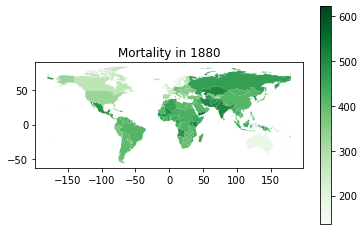

In [33]:
gdf = gpd.GeoDataFrame(df_mortality)
fig = gdf.plot(column='1880', cmap='Greens', legend=True);
fig.set_title("Mortality in 1880")

This is a markdown cell. This is the code I wrote to create two animated gif images of both income per person and mortality of children aged from 0 to 5 per 1000 born, all over the world from years 1880 to 2020. However, running this code will consume a lot of memory and time; so, you can see the outputed gif image dicrectly when you run the next markdown cells. I reused the code used in the fertility rate map by writing the code in a function (dynamic_map_gif) and calling it for both df_income and df_mortality data frames.
```python
def dynamic_map_gif(data, name, legend_range, first_legend_text):
    gdf = gpd.GeoDataFrame(data)
    image_frames = []
    for i in range(1, 222):# from 1880 to 2020 
        column_name = data.columns[i]
        fig = gdf.plot(column=column_name, cmap='Greens', edgecolor='black', linewidth=0.2, legend=True, scheme='user_defined', classification_kwds={'bins':legend_range},)
        fig.set_title(name+" in "+column_name)
        fig.set_axis_off()
        fig.get_legend().set_bbox_to_anchor((0.18,0.6)) 
        #remove -inf that appears at the beginning of the legend
        fig.get_legend().get_texts()[0].set_text(first_legend_text)
        img = fig.get_figure()
        f = io.BytesIO()
        img.savefig(f, format = 'png', bbox_inches='tight')
        f.seek(0)
        image_frames.append(PIL.Image.open(f))
    image_frames[0].save(name+'.gif', format='GIF', append_images=image_frames[1:], save_all=True, duration=200, loop=0)
    f.close()
    
#call function for both df_income and df_mortality
dynamic_map_gif(df_income, "Income per person", [245, 300, 1000, 5000, 10000, 20000, 50000, 100000, 150000, 179000], '(0.00,245]')
dynamic_map_gif(df_mortality, "Mortality of children per 1000 born", [1, 10, 50, 100, 200, 300, 400, 500, 600, 756], '(0.00,1.00]')
```

# Here is how the income per person changes all over the world from 1880 to 2020

<img src="Income per person.gif" width="700" align="center">

# Here is how the mortality of children aged from 0 to 5 years changes all over the world from 1880 to 2020 

<img src="Mortality of children per 1000 born.gif" width="700" align="center">

# After we explored 3 attributes thoroughly, we are going to join the 3 attributes and explore correclations between them

In [34]:
new_df = pd.DataFrame()
new_df['country'] = df_fertility['country'].copy() # the dataframe with the least countries
new_df['mean fertililty of a country'] = df_fertility.mean(axis=1)
df_mean_income = pd.DataFrame(df_income['country'])
df_mean_mortality = pd.DataFrame(df_mortality['country'])
df_mean_income['mean income of a country'] = df_income.mean(axis=1)
df_mean_mortality['mean mortality of a country'] = df_mortality.mean(axis=1)
new_df = new_df.merge(df_mean_income, how='left', on='country')
new_df = new_df.merge(df_mean_mortality, how='left', on='country')

new_df.head()

,country,mean fertililty of a country,mean income of a country,mean mortality of a country
0,Afghanistan,7.030724,1319.099548,389.253846
1,Albania,4.273575,2386.407240,275.785566
2,Algeria,6.478733,4254.330317,340.338009
3,Angola,6.982624,2254.692308,392.066968
4,Antigua and Barbuda,4.126335,5102.782805,200.024706


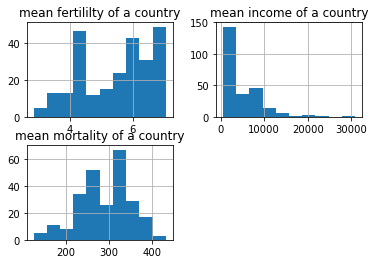

In [35]:
new_df.hist();

> According to the above histograms:

> In more than 40 countries, the mean fertility of years from 1880 to 2020 is 6 children per woman.

> The magority of the countries are poor having mean income per person less than 5000 international dollars (fixed 2011 prices, PPP based on 2011 ICP)

> The mean mortality of children ranging from 0 to 5 years old follows approximately normal distibution.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: The relation between income and fertility

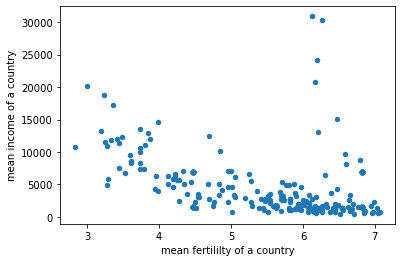

In [36]:
new_df.plot(x='mean fertililty of a country', y='mean income of a country', kind='scatter');

In [37]:
#new_df.value_counts()
new_df[new_df['mean income of a country']>20000]


,country,mean fertililty of a country,mean income of a country,mean mortality of a country
23,Brunei Darussalam,6.129955,30920.497738,292.027240
118,Kuwait,6.166154,20793.665158,345.106290
195,Qatar,6.263077,30341.719457,300.394615
227,Switzerland,2.994208,20237.647059,167.731538
241,United Arab Emirates,6.195928,24236.914027,311.844615


### Research Question 2: The relation between fertility and mortality

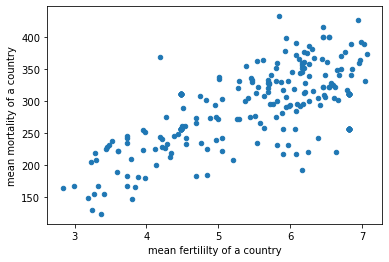

In [38]:
new_df.plot(x='mean fertililty of a country', y='mean mortality of a country', kind='scatter');

### Research Question 3: The relation between income and mortality

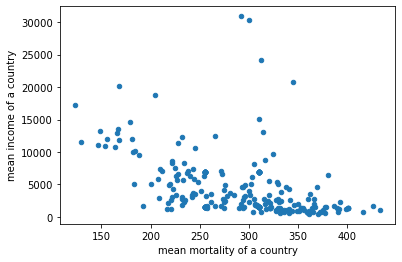

In [39]:
new_df.plot(x='mean mortality of a country', y='mean income of a country', kind='scatter');

In [40]:
new_df[new_df['mean income of a country']>25000]


,country,mean fertililty of a country,mean income of a country,mean mortality of a country
23,Brunei Darussalam,6.129955,30920.497738,292.027240
195,Qatar,6.263077,30341.719457,300.394615


<a id='conclusions'></a>
## Conclusions

> The fertility rate has decreased over the years all over the world

> Africa has the most fertility rate in the world currently

> In more than 40 countries, the mean fertility of years from 1880 to 2020 is 6 children per woman.

> The magority of the countries are poor having mean income per person among years 1880 to 2020 less than 5000 international dollars (fixed 2011 prices, PPP based on 2011 ICP)

> The mean mortality of children ranging from 0 to 5 years old follows approximately normal distibution.

> The mortality of children has decreased over the years all over the world

> There is a strong positive correlation between fertility and mortality of children aging from 0 to 5 

> Generally, there is a negative correlation between income and fertility. However, this is not always the case. For example, Brunei Darussalam, Kuwait, United Arab Emirates and Qatar have both high income and high fertility rate.

> Generally, there is a negative correlation between income and mortality. However, this is not always the case. For example, Brunei Darussalam	and Qatar has high income of more than 25000 and still relatively high mean mortality of 292.027240 and 300.394615 respectively 



<a id='references'></a>
## References

Inspired from:
https://www.youtube.com/watch?v=vLEA8dCfusQ

World Map:
https://drive.google.com/drive/folders/1cnQHqHBuLHnEcqYq8mWc95WJNK54LPL7

Data frames are read from:
1) child_mortality_0_5_year_olds_dying_per_1000_born.csv

2) children_per_woman_total_fertility.csv

3) income_per_person_gdppercapita_ppp_inflation_adjusted.csv

Downloaded from: https://www.gapminder.org/data/